# Задание 1

Задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока).

In [2]:
import datetime
from datetime import timedelta
from datetime import datetime

import pandas as pd
import numpy as np

import seaborn as sns

In [5]:
# данные о времени регистрации
reg_data_full = pd.read_csv('problem1-reg_data.csv', sep = ';')

#данные о времени захода пользователей в игру
auth_data_full = pd.read_csv('problem1-auth_data.csv', sep = ';')

In [6]:
reg_data_full.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [7]:
auth_data_full.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [8]:
data = auth_data_full.merge(reg_data_full, on = 'uid', how = 'left')

In [9]:
data['reg_ts'] = data.loc[:, ('reg_ts')].apply(datetime.fromtimestamp).astype('datetime64[D]')
data['auth_ts'] = data.loc[:, ('auth_ts')].apply(datetime.fromtimestamp).astype('datetime64[D]')

In [10]:
data = data[['uid', 'auth_ts', 'reg_ts']]

In [11]:
data.head(4)

,uid,auth_ts,reg_ts
0,1,1998-11-18,1998-11-18
1,2,1999-07-23,1999-07-23
2,2,1999-07-25,1999-07-23
3,2,1999-07-31,1999-07-23


In [12]:
data.tail(4)

,uid,auth_ts,reg_ts
9601009,1110619,2020-09-23,2020-09-23
9601010,1110620,2020-09-23,2020-09-23
9601011,1110621,2020-09-23,2020-09-23
9601012,1110622,2020-09-23,2020-09-23


In [13]:
data[['reg_ts', 'auth_ts']].max()

reg_ts    2020-09-23
auth_ts   2020-09-23
dtype: datetime64[ns]

In [14]:
data[['reg_ts', 'auth_ts']].min()

reg_ts    1998-11-18
auth_ts   1998-11-18
dtype: datetime64[ns]

In [15]:
def retantion(data, N = 1):
    # Функция для вычисления retantion игроков (по дням от даты регистрации игрока)
    # Функция возвращает датасет в котором игроки отсортированы по кагортам по дате регистрации
    data_copy = data.copy()
    data_copy[['delta']] = data_copy.loc[:, 'auth_ts'] - data_copy.loc[:, 'reg_ts']
    almost_retantion = data_copy.pivot_table(index='reg_ts',columns='delta',values='uid',aggfunc='nunique')
    retantion = np.round( almost_retantion.apply(lambda x: x/x['0 days'], axis=1) *100).loc[:, '1 days':]
    
    return retantion

In [16]:
#для примера посчитает retantion за последние две недели по имеющимся данным

test_data = data.query('reg_ts >= "2020-09-14"')

test_data.tail()

,uid,auth_ts,reg_ts
9601008,1110618,2020-09-23,2020-09-23
9601009,1110619,2020-09-23,2020-09-23
9601010,1110620,2020-09-23,2020-09-23
9601011,1110621,2020-09-23,2020-09-23
9601012,1110622,2020-09-23,2020-09-23


In [17]:
retantion(test_data)

delta,1 days,2 days,3 days,4 days,5 days,6 days,7 days,8 days,9 days
reg_ts,,,,,,,,,
2020-09-14,2.0,4.0,4.0,6.0,6.0,7.0,6.0,5.0,3.0
2020-09-15,2.0,4.0,5.0,6.0,6.0,7.0,6.0,3.0,NaN
2020-09-16,2.0,4.0,4.0,4.0,7.0,7.0,4.0,NaN,NaN
2020-09-17,2.0,4.0,5.0,6.0,6.0,5.0,NaN,NaN,NaN
2020-09-18,2.0,4.0,5.0,5.0,4.0,NaN,NaN,NaN,NaN
2020-09-19,2.0,3.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN
2020-09-20,3.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-21,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-22,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


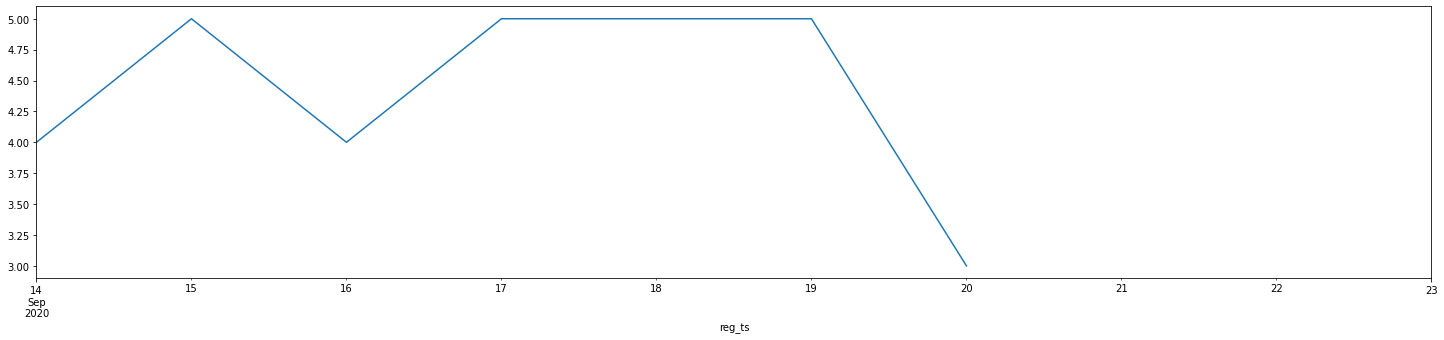

In [18]:
# график показывает как менялся retention N-го дня в зависимости от дня регистраци пользователя

N = 3

retantion(test_data).T.loc[str(N)+' days'].plot(figsize = (25,5))

Text(0.5, 2.5, 'День со дня регистрации')

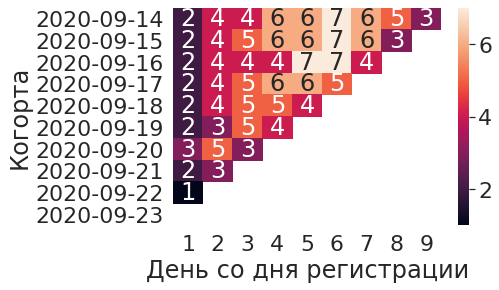

In [19]:
#реузльтаты работы функции более наглядно

df = retantion(test_data)

yticks = list(df.index.astype(str))
xticks = list(map(lambda x : x[0], df.columns.astype(str)))

sns.set(font_scale=2,style="whitegrid")
ax = sns.heatmap(df,  annot=True, yticklabels=yticks, xticklabels=xticks)

ax.set_ylabel('Когорта')
ax.set_xlabel('День со дня регистрации')